### Problem Statement

Download Abalone dataset (URL: http://archive.ics.uci.edu/ml/datasets/Abalone).     
Data set has total 8 Number of Attributes.

<table>
    <th>Sr. No.</th>
    <th>Name</th>
    <th>Data Type</th>
    <th>Unit</th>
    <th>Description</th>
    <tr>
        <td>1.</td>
        <td>Sex</td>
        <td>Nominal</td>
        <td>--</td>
        <td>M, F and I (infant)</td>
    </tr>
    <tr>
        <td>2.</td>
        <td>Length</td>
        <td>Continuous</td>
        <td>mm</td>
        <td>Longest shell measurement</td>
    </tr>
    <tr>
        <td>3.</td>
        <td>Diameter</td>
        <td>Continuous</td>
        <td>mm</td>
        <td>Perpendicular to length</td>
    </tr>
    <tr>
        <td>4.</td>
        <td>Height</td>
        <td>Continuous</td>
        <td>mm</td>
        <td>with meat in shell</td>
    </tr>
    <tr>
        <td>5.</td>
        <td>Whole weight</td>
        <td>Continuous</td>
        <td>grams</td>
        <td>whole abalone</td>
    </tr>
    <tr>
        <td>6.</td>
        <td>Shucked weight</td>
        <td>Continuous</td>
        <td>grams</td>
        <td>weight of meat</td>
    </tr>
    <tr>
        <td>7.</td>
        <td>Viscera weight</td>
        <td>Continuous</td>
        <td>grams</td>
        <td>gut weight (after bleeding)</td>
    </tr>
    <tr>
        <td>8.</td>
        <td>Shell weight</td>
        <td>Continuous</td>
        <td>grams</td>
        <td>after being dried</td>
    </tr>
    <tr>
        <td>9.</td>
        <td>Rings</td>
        <td>Integer</td>
        <td>--</td>
        <td>age/class of abalone</td>
    </tr>
</table>

- Load the data from data file.  
- Explore the shape of dataset.  
- Summarize the properties in the training dataset.
- Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.  
- Split data into train, test sets.  
- Predict the age of abalone from physical measurements usinglinear regression.  
- Plot scatterplot of real data points and regression line.  
- Display the coefficients & intercept, accuracy score, Mean Squared Error (MSE) and RMSE.  

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [3]:
columns = ['sex','length','diameter','height','weight_a','weight_b','weight_c','weight_d','rings']
df = pd.read_csv('abalone_data.csv',names=columns)
df.head()

,sex,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   length    4177 non-null   float64
 2   diameter  4177 non-null   float64
 3   height    4177 non-null   float64
 4   weight_a  4177 non-null   float64
 5   weight_b  4177 non-null   float64
 6   weight_c  4177 non-null   float64
 7   weight_d  4177 non-null   float64
 8   rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:>

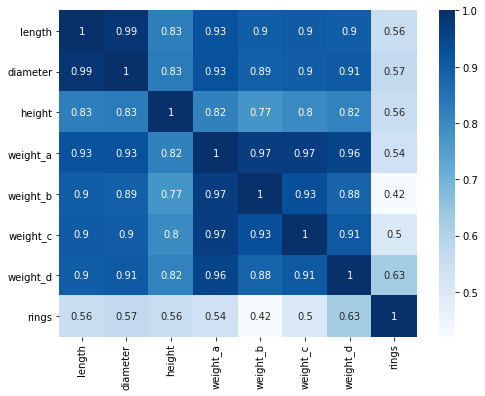

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='rings', ylabel='Count'>

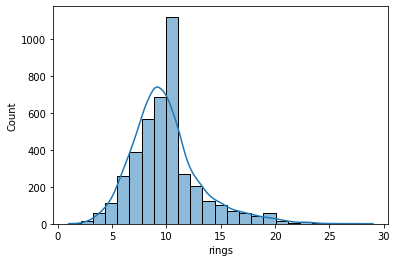

In [6]:
sns.histplot(data=df,x='rings',bins=25,kde=True)

<AxesSubplot:xlabel='weight_a', ylabel='rings'>

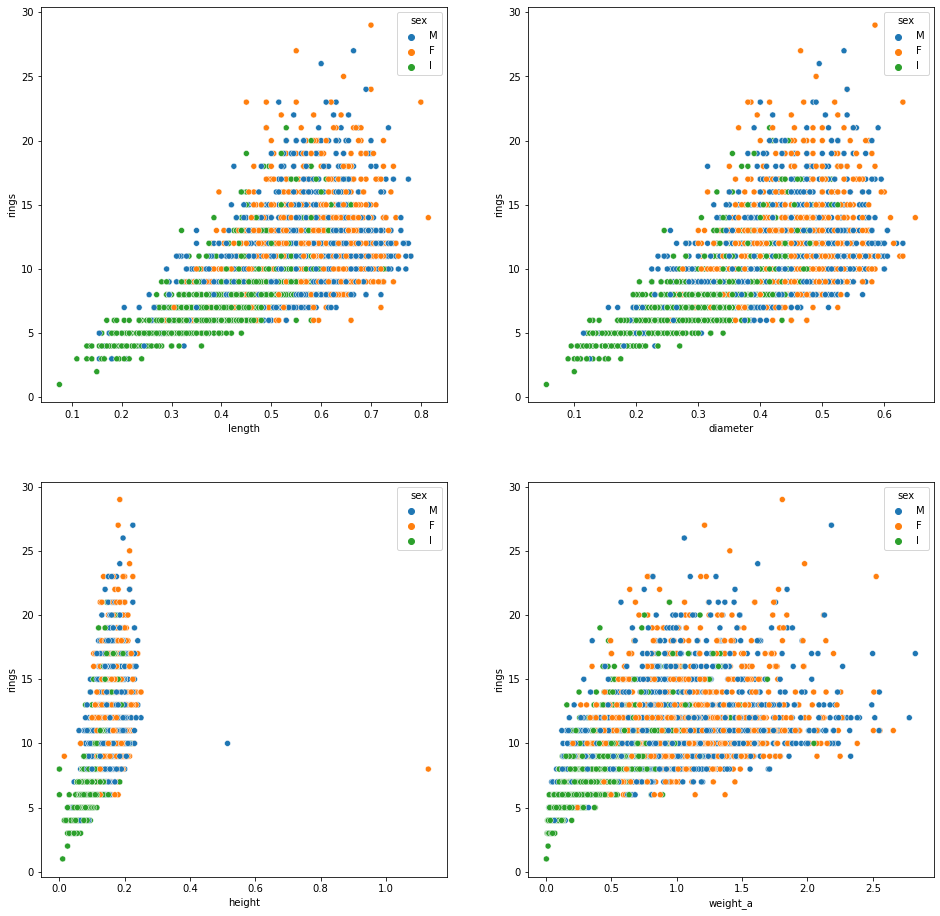

In [7]:
fig,axes = plt.subplots(2,2,figsize=(16,16))
sns.scatterplot(x='length',y='rings',data=df,hue='sex',ax=axes[0][0])
sns.scatterplot(x='diameter',y='rings',data=df,hue='sex',ax=axes[0][1])
sns.scatterplot(x='height',y='rings',data=df,hue='sex',ax=axes[1][0])
sns.scatterplot(x='weight_a',y='rings',data=df,hue='sex',ax=axes[1][1])

In [8]:
df['M'] = df['sex'].apply(lambda x: x=='M')
df['F'] = df['sex'].apply(lambda x: x=='F')
df['I'] = df['sex'].apply(lambda x: x=='I')
df.head()

,sex,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


In [9]:
x = df[['length','diameter','height','weight_a','weight_b','weight_c','weight_d','M','F','I']]
y = df['rings']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=73)

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.score(x_train,y_train)

0.5433472634330568

In [12]:
model.score(x_test,y_test)

0.5221968188241093

In [13]:
test_set_prediction = model.predict(x_test)

In [14]:
metrics.mean_absolute_error(y_test,test_set_prediction)

1.57238127105297

In [15]:
metrics.mean_squared_error(y_test,test_set_prediction)

4.597663994682728

In [16]:
metrics.r2_score(y_test,test_set_prediction)

0.5221968188241093

In [17]:
coeff = pd.DataFrame(data=model.coef_,index=x_train.columns,columns=['coefficients'])
coeff

,coefficients
length,-1.532476
diameter,12.816368
height,9.285460
weight_a,9.491684
weight_b,-20.783162
weight_c,-10.464653
weight_d,8.935954
M,0.318966
F,0.247125
I,-0.566091


In [18]:
model.intercept_

3.5845429573758265

<AxesSubplot:xlabel='rings'>

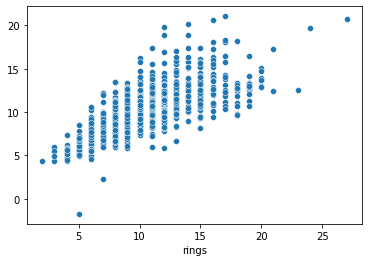

In [19]:
sns.scatterplot(x=y_test,y=test_set_prediction)

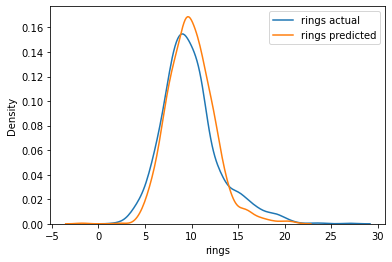

In [20]:
sns.kdeplot(y_test,label='rings actual')
sns.kdeplot(test_set_prediction,label='rings predicted')
plt.legend()